1. Inicialización e importaciones

In [14]:
import sys
import os

# FIX para el ModuleNotFoundError
if 'notebooks' in os.getcwd():
    sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
else:
    sys.path.append(os.path.abspath(os.getcwd()))

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Creamos las carpetas de resultados, ya que las figuras se guardarán aquí
os.makedirs('results/figures', exist_ok=True)

print("Las features se cargarán desde CSV.")

Las features se cargarán desde CSV.


2. Cargar y preprocesamiento

In [15]:
PROCESSED_FILE = 'data/processed/fakenewsnet_processed.csv'

try:
    # Cargamos el archivo que generamos en la terminal con Scraping y OCR
    df = pd.read_csv(PROCESSED_FILE)
    print(f"Features cargadas exitosamente. Total de artículos: {len(df)}")
    
    # 1. Definir nuestras variables X e y
    X = df[['X_baseline', 'X_ocr_model']]
    y = df['label']
    
except FileNotFoundError:
    print(f"ERROR: No se encontró el archivo procesado en '{PROCESSED_FILE}'.")
    print("Por favor, asegúrese de haber ejecutado 'python src/data_loader.py' en la terminal.")
    X = None
    y = None

if X is not None:
    print("\nMuestra de Features Listas para el Modelo")
    print(X.head(2))

Features cargadas exitosamente. Total de artículos: 240

Muestra de Features Listas para el Modelo
                                          X_baseline  \
0  trump insulted millions lost everything bushs ...   
1  famous dog killed spot waited year owner retur...   

                                         X_ocr_model  
0  trump insulted millions lost everything bushs ...  
1  famous dog killed spot waited year owner retur...  


3. Dividir los datos

In [20]:
# Dividir los datos
if X is not None:
    X_train, X_test, y_train, y_test = train_test_split(
        X, # Pasamos ambas columnas
        y,
        test_size=0.4,
        random_state=42,
        stratify=y 
    )

    print(f"Datos de entrenamiento: {len(X_train)}")
    print(f"Datos de prueba: {len(X_test)}")
else:
    print("No se puede ejecutar la división de datos (X es nulo).")

Datos de entrenamiento: 144
Datos de prueba: 96


4. Experimento A: Modelo baseline solo texto


RESULTADOS:
              precision    recall  f1-score   support

    REAL (0)       0.19      0.21      0.20        48
    FAKE (1)       0.14      0.12      0.13        48

    accuracy                           0.17        96
   macro avg       0.16      0.17      0.17        96
weighted avg       0.16      0.17      0.17        96



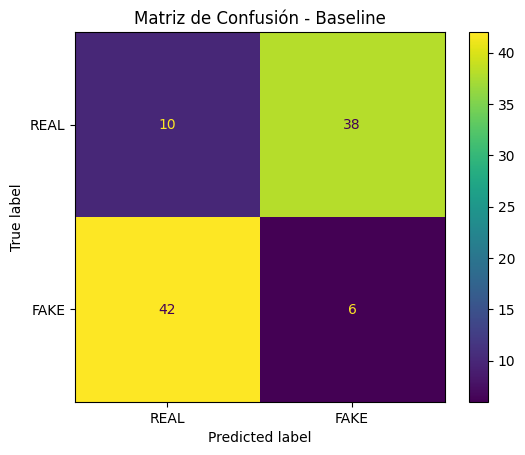

In [21]:
if X is not None:

    # 1. Vectorizador
    vectorizer_base = TfidfVectorizer(max_features=5000)

    # 2. Vectorizar la feature X_baseline 
    X_train_vec_base = vectorizer_base.fit_transform(X_train['X_baseline'])
    X_test_vec_base = vectorizer_base.transform(X_test['X_baseline'])

    # 3. Modelo y Entrenamiento
    model_base = RandomForestClassifier(random_state=42)
    model_base.fit(X_train_vec_base, y_train)

    # 4. Evaluación
    print("\nRESULTADOS:")
    y_pred_base = model_base.predict(X_test_vec_base)
    print(classification_report(y_test, y_pred_base, target_names=['REAL (0)', 'FAKE (1)']))

    # 5. Matriz de Confusión
    ConfusionMatrixDisplay.from_estimator(model_base, X_test_vec_base, y_test, display_labels=['REAL', 'FAKE'])
    plt.title('Matriz de Confusión - Baseline')
    plt.savefig('results/figures/confusion_matrix_baseline.png')
    plt.show()

5. Experimento B: Texto + OCR


--- RESULTADOS: MODELO PROPUESTO (Texto + OCR) ---
              precision    recall  f1-score   support

    REAL (0)       0.19      0.21      0.20        48
    FAKE (1)       0.14      0.12      0.13        48

    accuracy                           0.17        96
   macro avg       0.16      0.17      0.17        96
weighted avg       0.16      0.17      0.17        96



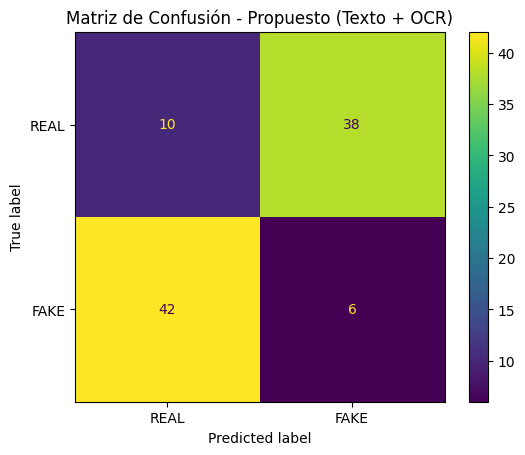

In [24]:
if X is not None:

    # 1. Vectorizador
    vectorizer_ocr = TfidfVectorizer(max_features=5000)

    # 2. Vectorizar la feature X_ocr_model 
    X_train_vec_ocr = vectorizer_ocr.fit_transform(X_train['X_ocr_model'])
    X_test_vec_ocr = vectorizer_ocr.transform(X_test['X_ocr_model'])

    # 3. Modelo y Entrenamiento
    model_ocr = RandomForestClassifier(random_state=42)
    model_ocr.fit(X_train_vec_ocr, y_train)

    # 4. Evaluación
    print("\n--- RESULTADOS: MODELO PROPUESTO (Texto + OCR) ---")
    y_pred_ocr = model_ocr.predict(X_test_vec_ocr)
    print(classification_report(y_test, y_pred_ocr, target_names=['REAL (0)', 'FAKE (1)']))

    # 5. Matriz de Confusión
    ConfusionMatrixDisplay.from_estimator(model_ocr, X_test_vec_ocr, y_test, display_labels=['REAL', 'FAKE'])
    plt.title('Matriz de Confusión - Propuesto (Texto + OCR)')
    plt.savefig('results/figures/confusion_matrix_ocr.png')
    plt.show()